In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

presentation_period= 0.35 #stim presnetation time
presentation_period_cue=  0.50 #presentation of attentional cue time
pre_stim_period= 0.5 #time between cue and stim
resp_time = 4  #time the response is active

In [17]:
# Functions
def boots_by_subj(data, col_int, col_subj, n_iterations, alpha, stat):
    #### you give a 2 column df, one column qith the value and the other column with subject index:
    list_subjects = data[col_subj].unique()
    sample=[]
    for n in range(n_iterations):
        resampled=[]
        new_sample = list(np.random.randint(0, len(list_subjects), len(list_subjects)))
        for res_s in new_sample:
            resampled = resampled + list(data.loc[data[col_subj]==list_subjects[res_s], col_int].values) 
        #
        sample.append(stat(resampled))
    #
    stats_sorted = np.sort(sample)
    new_mean=np.mean(sample)
    return (new_mean, stats_sorted[int((alpha/2.0)*n_iterations)],
            stats_sorted[int((1-alpha/2.0)*n_iterations)])


###
###


def line_significance(timepoints, ci_inf, ci_sup, y_min_shad, y_max_shad, color_sh):
    for idx_t in range(  len(timepoints)-1 ):
        half = timepoints[1]/2 
        #if ci_inf[idx_t]<= 0 <= ci_sup[idx_t]:    #### inferior and superior
        #    plt.fill_between(  [timepoints[idx_t], timepoints[idx_t+1] ], [y_min_shad, y_min_shad], [y_max_shad, y_max_shad], color='w', alpha=0.3)
        
        if ci_inf[idx_t]<= 0 : ### just superior
            plt.fill_between(  [timepoints[idx_t] - half, timepoints[idx_t+1] - half -0.25 ], [y_min_shad-0.05, y_min_shad-0.05], [y_max_shad, y_max_shad], color='w', step= 'mid', alpha=0.3)
        
        else:
            plt.fill_between(  [timepoints[idx_t] - half,  timepoints[idx_t+1] - half -0.25 ], [y_min_shad-0.05, y_min_shad-0.05], [y_max_shad, y_max_shad], color=color_sh, step= 'mid',alpha=0.3)


            
###


from mlxtend.evaluate import permutation_test

# p_value = permutation_test(value, shuffle, method='approximate', num_rounds=10000, seed=0)
# print(p_value)





#         ## Plot the significance line
#         for index_color, brain_reg in enumerate(['visual', 'ips', 'frontinf']):
#             all_timepoints = list( data_cond.loc[data_cond['brain_reg']==brain_reg].time )
#             conf_inf = list( data_cond.loc[data_cond['brain_reg']==brain_reg].inf )
#             conf_sup = list( data_cond.loc[data_cond['brain_reg']==brain_reg].sup )
#             color_sign = pal[index_color]
#             y_min_shad = -7 - index_color
#             y_max_shad = -8 - index_color
#             line_significance(all_timepoints, conf_inf, conf_sup, y_min_shad, y_max_shad, color_sh=color_sign)




###

def plot_decoding(df_plot, title_plot):
    ##
    ###
    ####   In the input dataframe you need the following columns:
    ###  'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition'
    ## 
    pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]
    ##
    fig = plt.figure(figsize=(10,8))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [1, 30]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [1, 36]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -100 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = -50 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        
        data_cond = df_plot.loc[df_plot['condition']==condition ]
        sns.lineplot( ax=ax, x="times", y="decoding_neg", hue='region', ci=68,
                     hue_order =  ['visual', 'ips', 'pfc'], palette=pal, data=data_cond)
        #plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response

        ## Plot the significance line
        #for idx_reg, reg in enumerate(['visual', 'ips', 'frontinf']):
        for idx_reg, reg in enumerate(['visual', 'ips', 'pfc']):
            subj_sig = [data_cond.loc[(data_cond['region']==reg) & (data_cond['times']==t_) ].significant.sum() for t_ in data_cond.times.unique()]    
            ## at least 3 sign subjects
            l=[]
            for n in subj_sig:
                if n<=1:
                    l.append(0)
                else:
                    l.append(n)
            ##
            for idx, t_ in enumerate(df_plot.times.unique()):
                plt.plot(t_, -20+(idx_reg*2) , marker = 'o', color=pal[idx_reg],  markersize=l[idx]*2 )
        #
        ###
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        #plt.yticks([-4, 0 , 4])
        plt.xlim(xlim)
        plt.ylim(-105, -10)
        plt.ylabel('error (x-1)')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(loc= 2, frameon=False)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( title_plot, fontsize=18) ## main title
    plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show
    

    
#####


## Target mix

In [12]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\leave1out\\signal_all_target_mix_l1o_prueba10.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\leave1out\\shuff_all_target_mix_l1o_prueba10.xlsx'
decoding_element='target'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df.columns = ['decoding', 'times', 'region', 'subject', 'condition', 'label']
Df_shuff = pd.read_excel(path_save_shuffle)


mean_center = []
for cond_ in Df.condition.unique(): #for condition
    for reg_ in Df.region.unique(): # for region
        for time_ in Df.times.unique(): #for time
            for subj_ in Df.subject.unique(): #for subject
                ### Decoding value per subject and time
                decoding_subj = Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & (Df['subject']==subj_) & 
                                       (Df['times']==time_)].decoding.values[0] 
                
                #### Compare this value with the pool of shuffles (100 values axis 0, 90, ...)
                shuffl_values = Df_shuff.loc[(Df_shuff['condition']==cond_) & (Df_shuff['region']==reg_) & 
                                             (Df_shuff['subject']==subj_) & (Df_shuff['times']==time_)].decoding.values
                p_value = permutation_test([decoding_subj], shuffl_values, method='approximate', num_rounds=1000, seed=0)
                if p_value<0.05:
                    sign=True
                else:
                    sign=False
                ## save results
                mean_center.append( [cond_, reg_, time_, decoding_subj, subj_, sign, p_value, decoding_element  ])
                
            
    

Df_ = pd.DataFrame(mean_center)
Df_.columns=['condition', 'region', 'times', 'decoding', 'subject', 'significant', 'pvalue', 'decoding_element']
Df_['decoding_neg'] = Df_['decoding']*-1


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


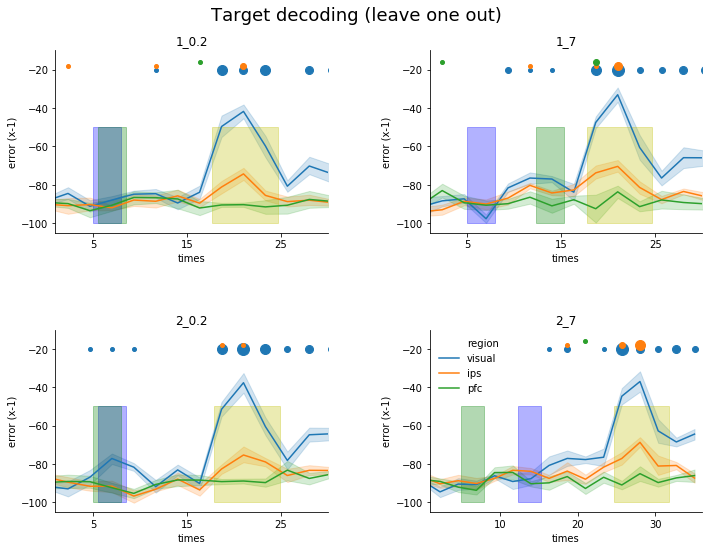

In [19]:
plot_decoding(Df_, 'Target decoding (leave one out)')

In [ ]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\leave1out\\signal_all_distractor_mix_l1o_prueba10.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\leave1out\\shuff_all_distractor_mix_l1o_prueba10.xlsx'
decoding_element='target'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df.columns = ['decoding', 'times', 'region', 'subject', 'condition', 'label']
Df_shuff = pd.read_excel(path_save_shuffle)


mean_center = []
for cond_ in Df.condition.unique(): #for condition
    for reg_ in Df.region.unique(): # for region
        for time_ in Df.times.unique(): #for time
            for subj_ in Df.subject.unique(): #for subject
                ### Decoding value per subject and time
                decoding_subj = Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & (Df['subject']==subj_) & 
                                       (Df['times']==time_)].decoding.values[0] 
                
                #### Compare this value with the pool of shuffles (100 values axis 0, 90, ...)
                shuffl_values = Df_shuff.loc[(Df_shuff['condition']==cond_) & (Df_shuff['region']==reg_) & 
                                             (Df_shuff['subject']==subj_) & (Df_shuff['times']==time_)].decoding.values
                p_value = permutation_test([decoding_subj], shuffl_values, method='approximate', num_rounds=1000, seed=0)
                if p_value<0.05:
                    sign=True
                else:
                    sign=False
                ## save results
                mean_center.append( [cond_, reg_, time_, decoding_subj, subj_, sign, p_value, decoding_element  ])
                
            
    

Df_ = pd.DataFrame(mean_center)
Df_.columns=['condition', 'region', 'times', 'decoding', 'subject', 'significant', 'pvalue', 'decoding_element']
Df_['decoding_neg'] = Df_['decoding']*-1


In [ ]:
plot_decoding(Df_, 'Distractor decoding (leave one out)')